In [65]:
import pandas as pd
data = pd.read_csv(r"data-ori.csv")

In [66]:
from sklearn.model_selection import train_test_split

features = [feat for feat in data.columns if feat !='Result']

X = data[features]
y = data['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

X_train.shape, X_test.shape

((3529, 10), (883, 10))

In [67]:
print(f"The dataset contains {data.shape[0]} rows and {data.shape[1]} columns")

num_features = [feat for feat in features if data[feat].dtype != object]
cat_features = [feat for feat in features if data[feat].dtype == object]

print(f"Total number of features : {len(features)}")
print(f"Number of numerical features : {len(num_features)}")
print(f"Number of categorical features : {len(cat_features)}\n")

The dataset contains 4412 rows and 11 columns
Total number of features : 10
Number of numerical features : 9
Number of categorical features : 1



In [68]:
X_train=X_train.drop(["SEX"],axis=1)

In [69]:
X_test=X_test.drop(["SEX"],axis=1)


In [70]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

Model: Random Forest
Confusion Matrix:
[[440  86]
 [135 222]]
Accuracy: 0.7497168742921857


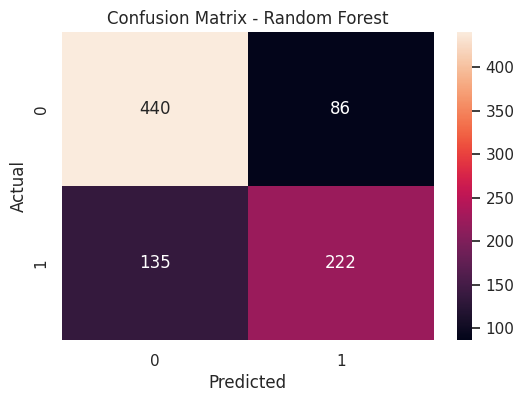

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       526
           1       0.72      0.62      0.67       357

    accuracy                           0.75       883
   macro avg       0.74      0.73      0.73       883
weighted avg       0.75      0.75      0.75       883

Model: DecisionTree
Confusion Matrix:
[[382 144]
 [132 225]]
Accuracy: 0.6874292185730464


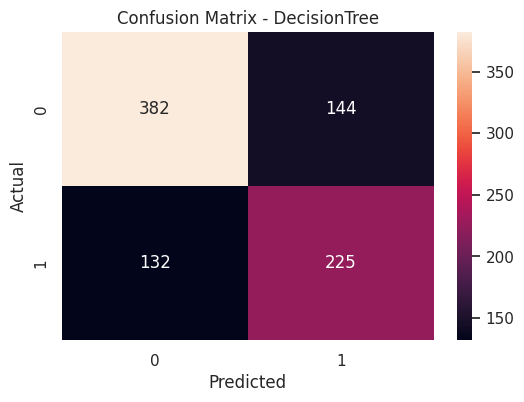

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       526
           1       0.61      0.63      0.62       357

    accuracy                           0.69       883
   macro avg       0.68      0.68      0.68       883
weighted avg       0.69      0.69      0.69       883

Model: KNN
Confusion Matrix:
[[407 119]
 [163 194]]
Accuracy: 0.6806342015855039


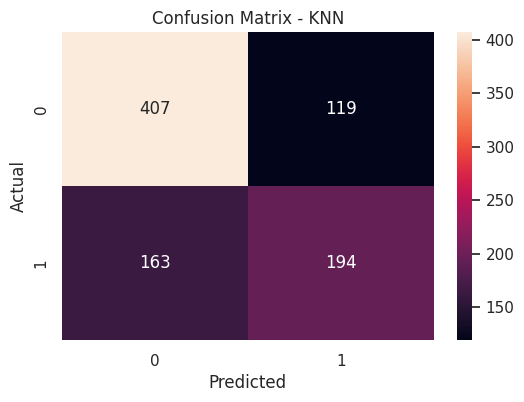

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       526
           1       0.62      0.54      0.58       357

    accuracy                           0.68       883
   macro avg       0.67      0.66      0.66       883
weighted avg       0.68      0.68      0.68       883

Model: MLPClassifier
Confusion Matrix:
[[485  41]
 [218 139]]
Accuracy: 0.7066817667044167


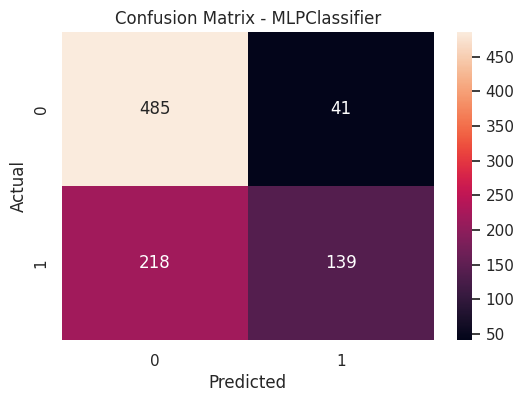

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.92      0.79       526
           1       0.77      0.39      0.52       357

    accuracy                           0.71       883
   macro avg       0.73      0.66      0.65       883
weighted avg       0.72      0.71      0.68       883

Model: AdaBoost
Confusion Matrix:
[[429  97]
 [157 200]]
Accuracy: 0.7123442808607021


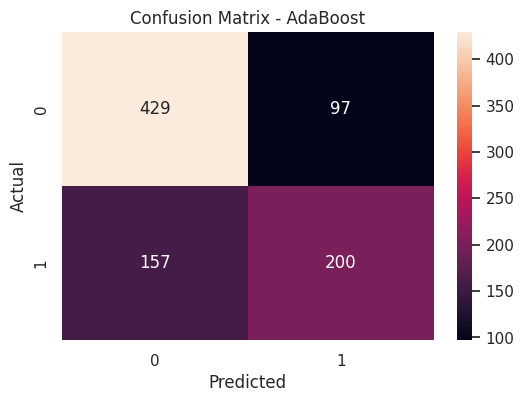

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.82      0.77       526
           1       0.67      0.56      0.61       357

    accuracy                           0.71       883
   macro avg       0.70      0.69      0.69       883
weighted avg       0.71      0.71      0.71       883

Model: XGBoost
Confusion Matrix:
[[422 104]
 [125 232]]
Accuracy: 0.7406568516421291


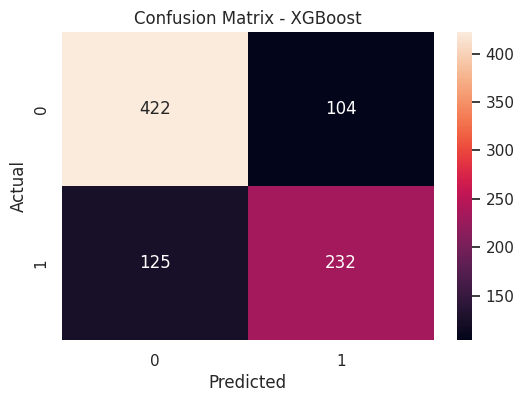

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       526
           1       0.69      0.65      0.67       357

    accuracy                           0.74       883
   macro avg       0.73      0.73      0.73       883
weighted avg       0.74      0.74      0.74       883

The best performing classifier is: Random Forest with an accuracy of 0.75


<ipython-input-71-2693aaea94d8>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(models.keys()), y=accuracies, palette="muted")


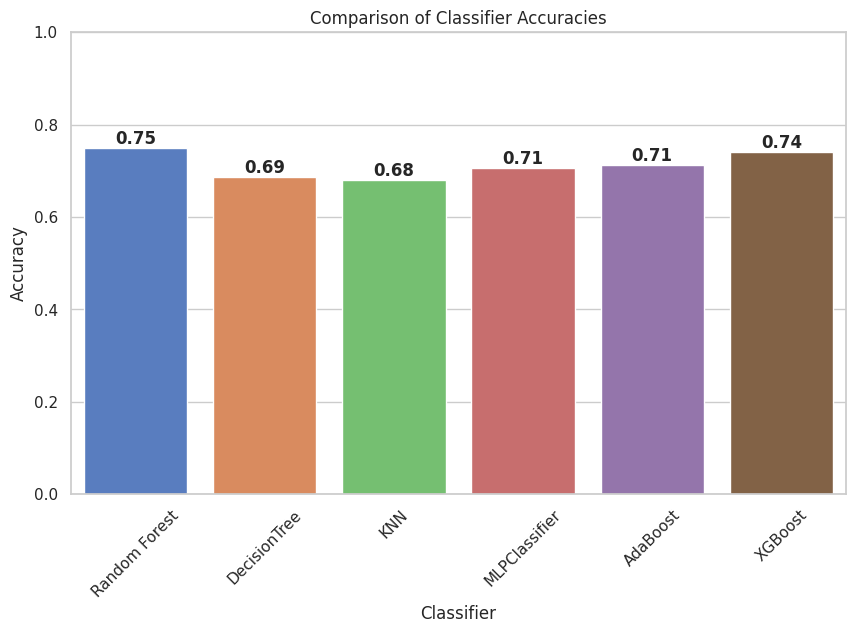

In [71]:
#Creating a dictionary to store model name as key and model function as value.

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=3000),
    "DecisionTree" : DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "MLPClassifier": MLPClassifier(hidden_layer_sizes=(64,),activation = "relu"),
    #"SVM": SVC(kernel="linear"),
    "AdaBoost" : AdaBoostClassifier(n_estimators=100, random_state=40),
    "XGBoost": XGBClassifier()
}

accuracies = []  # Store the accuracies of all models
best_model = None #Stores Best model name
best_accuracy = 0 #Stores best model Accuracy.

for model_name, model in models.items():
    print(f"Model: {model_name}")
    print("=" * 30)

    # Fit the model
    model.fit(X_train, y_train)
    X_test_processed = X_test

    # Predict on the test set
    y_pred = model.predict(X_test_processed)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Calculate accuracy
    accuracy = np.mean(y_pred == y_test)
    accuracies.append(accuracy)  # Store the accuracy for later plotting
    print("Accuracy:", accuracy)

    # Plotting the heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d",)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    cr = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(cr)
    print("=" * 30)

    # Check if the current model has better accuracy
    if accuracy > best_accuracy:
        best_model = model_name
        best_accuracy = accuracy

print(f"The best performing classifier is: {best_model} with an accuracy of {best_accuracy:.2f}")

# Set Seaborn style
sns.set(style="whitegrid")

# Plotting the histogram of accuracies with beautiful aesthetics
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(models.keys()), y=accuracies, palette="muted")
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Comparison of Classifier Accuracies")
plt.ylim(0, 1.0)  # Set the y-axis limit to ensure the scale is from 0 to 1
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility

# Add accuracy labels on top of each bar
for i, acc in enumerate(accuracies):
    ax.text(i, acc, f"{acc:.2f}", ha='center', va='bottom', fontweight='bold')

plt.show()

In [72]:
import tensorflow_privacy

from tensorflow_privacy.privacy.analysis import compute_dp_sgd_privacy

In [73]:
import tensorflow as tf
tf.compat.v1.disable_v2_behavior()

import numpy as np

tf.get_logger().setLevel('ERROR')

In [74]:
pip install tensorflow-privacy

In [75]:
epochs = 3
batch_size = 250
l2_norm_clip = 1.5
noise_multiplier = 1.3
num_microbatches = 250
learning_rate = 0.25

if batch_size % num_microbatches != 0:
  raise ValueError('Batch size should be an integer multiple of the number of microbatches')

In [76]:
import tensorflow as tf
import keras
from keras import layers

In [77]:
optimizer = tensorflow_privacy.DPKerasSGDOptimizer(
    l2_norm_clip=l2_norm_clip,
    noise_multiplier=noise_multiplier,
    num_microbatches=num_microbatches,
    learning_rate=learning_rate)

loss = tf.keras.losses.BinaryCrossentropy(
    from_logits=False, reduction=tf.losses.Reduction.NONE)

In [60]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (3529, 9)
y_train shape: (3529,)
X_test shape: (883, 9)
y_test shape: (883,)


In [61]:

plt.show()

In [63]:
print(history)

In [89]:

from tensorflow.keras.layers import SimpleRNN, Dense



# Load and preprocess your data
data = pd.read_csv("data-ori.csv")
X = data.drop(columns=['Result', 'SEX']).values
y = data['Result'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input data to fit the RNN input shape
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the RNN architecture
model = Sequential([
    SimpleRNN(64, input_shape=(X.shape[1], 1), activation='relu'),  # RNN layer
    Dense(32, activation='relu'), Dense(32, activation='relu'),                                 # Hidden layer
    Dense(1, activation='sigmoid')                                  # Output layer
])


# Compile the model
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=320, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_reshaped, y_test)
print('Test accuracy:', test_acc)


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_9 (SimpleRNN)    (None, 64)                4224      
                                                                 
 dense_31 (Dense)            (None, 32)                2080      
                                                                 
 dense_32 (Dense)            (None, 32)                1056      
                                                                 
 dense_33 (Dense)            (None, 1)                 33        
                                                                 
Total params: 7393 (28.88 KB)
Trainable params: 7393 (28.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Train on 3529 samples, validate on 883 samples
Epoch 1/320
3424/3529 [============================>.] - ETA: 0s - loss: 0.9147 - acc: 0.6522

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


3529/3529 [==============================] - 1s 219us/sample - loss: 0.9075 - acc: 0.6517 - val_loss: 0.6675 - val_acc: 0.6331
Epoch 2/320
3529/3529 [==============================] - 0s 131us/sample - loss: 0.6070 - acc: 0.6832 - val_loss: 0.6126 - val_acc: 0.6625
Epoch 3/320
3529/3529 [==============================] - 0s 132us/sample - loss: 0.6008 - acc: 0.6863 - val_loss: 0.6132 - val_acc: 0.6659
Epoch 4/320
3529/3529 [==============================] - 0s 129us/sample - loss: 0.5975 - acc: 0.6849 - val_loss: 0.6139 - val_acc: 0.6535
Epoch 5/320
3529/3529 [==============================] - 1s 208us/sample - loss: 0.5952 - acc: 0.6891 - val_loss: 0.6043 - val_acc: 0.6636
Epoch 6/320
3529/3529 [==============================] - 1s 203us/sample - loss: 0.5964 - acc: 0.6863 - val_loss: 0.6296 - val_acc: 0.6557
Epoch 7/320
3529/3529 [==============================] - 1s 206us/sample - loss: 0.5916 - acc: 0.6829 - val_loss: 0.6044 - val_acc: 0.6625
Epoch 8/320
3529/3529 [================

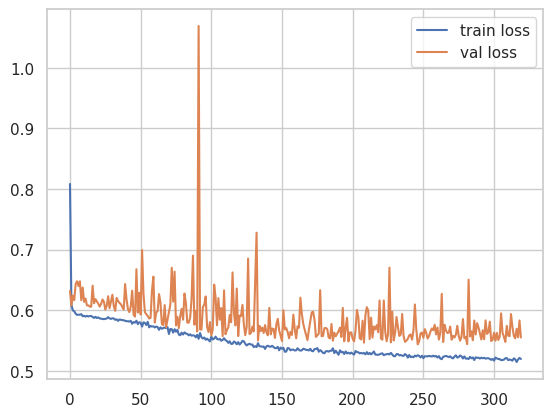

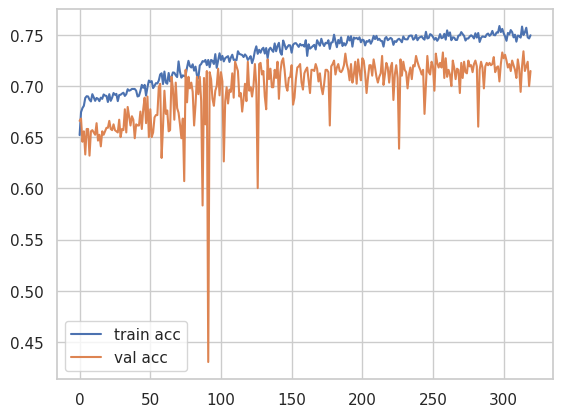

In [86]:
# accuracies
plt.plot(history.history['acc'], label='train acc')
plt.plot(history.history['val_acc'], label='val acc')
plt.legend()

#plt.savefig('/content/drive/MyDrive/acc-rps-1.svg')
plt.show()

'\nimport numpy as np\nimport pandas as pd\nfrom sklearn.model_selection import train_test_split\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense\n\n# Assuming your data is stored in a DataFrame named \'data\'\n# Remove the "SEX" column as you did before\n#data = data.drop(columns=["SEX"])\n\n# Split data into features (X) and target (y)\nX = data.drop(columns=[\'Result\',\'SEX\']).values\ny = data[\'Result\'].values\n\n# Split data into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Define the neural network architecture\nmodel = Sequential([\n    Dense(64, activation=\'relu\', input_shape=(X.shape[1],)),  # Input layer\n    Dense(32, activation=\'relu\'),                             # Hidden layer\n    Dense(1, activation=\'sigmoid\')                            # Output layer\n])\n\n# Compile the model\nmodel.compile(optimizer=\'sgd\',\n              loss=\'binary_cros